# EDA of All Sides Media rating for 'debiaser' data product
#### Sagar Setru, September 21th, 2020

## Brief description using CoNVO framework

### Context

Some people are eager to get news from outside of their echo chamber. However, they do not know where to go outside of their echo chambers, and may also have some activation energy when it comes to seeking information from other sources. In the meantime, most newsfeeds only push you content that you agree with. You end up in an echo chamber, but may not have ever wanted to be in one in the first place.

### Need

A way to find news articles from different yet reliable media sources.

### Vision

Debiaser, a data product (maybe Chrome plug-in?) that will recommend news articles similar in topic to the one currently being read, but from several pre-curated and reliable news media organizations across the political spectrum, for example, following the "media bias chart" here https://www.adfontesmedia.com/ or the "media bias ratings" here: https://www.allsides.com/media-bias/media-bias-ratings. The app will determine the main topics of the text of a news article, and then show links to similar articles from other news organizations.

The product will generate topics for a given document via latent Dirichlet allocation (LDA) and then search news websites for the topic words generated.

Caveats: Many of these articles may be behind paywalls. News aggregators already basically do this. How different is this than just searching Google using the title of an article?

### Outcome

People who are motivated to engage in content outside of their echo chambers have a tool that enables them to quickly find news similar to what they are currently reading, but from a variety of news organizations.

In [86]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

In [87]:
# make sure I'm in the right environment (should be 'insight')
print('Conda environment:')
print(os.environ['CONDA_DEFAULT_ENV'])

Conda environment:
insight


In [4]:
# get the entire news csv into data frame

# get file name
fname = './all_sides_media_data/allsides.csv'

# load into data frame
all_sides_df = pd.read_csv(fname)

In [5]:
all_sides_df.head()

,agree,agree_ratio,agreeance_text,allsides_page,bias,disagree,name,total_votes
0,21052,1.680530,Agrees,https://www.allsides.com/news-source/abc-news-...,left-center,12527,ABC News (Online),33579
1,80,2.857143,Strongly Agrees,https://www.allsides.com/news-source/above-law...,left-center,28,Above The Law,108
2,223,1.581560,Agrees,https://www.allsides.com/news-source/abridge-n...,allsides,141,Abridge News,364
3,263,2.481132,Strongly Agrees,https://www.allsides.com/news-source/aj-media-...,left,106,AJ+,369
4,4217,0.631382,Disagrees,https://www.allsides.com/news-source/al-jazeer...,left-center,6679,Al Jazeera,10896


In [6]:
# get number of nan
all_sides_df.isnull().sum()

agree             0
agree_ratio       0
agreeance_text    0
allsides_page     0
bias              0
disagree          0
name              0
total_votes       0
dtype: int64

In [10]:
all_sides_df.shape

(300, 8)

There are 300 news media organizations represented. That's a lot to choose from.

In [11]:
# confirm all media organizations are only shown once
all_sides_df['name'].is_unique

True

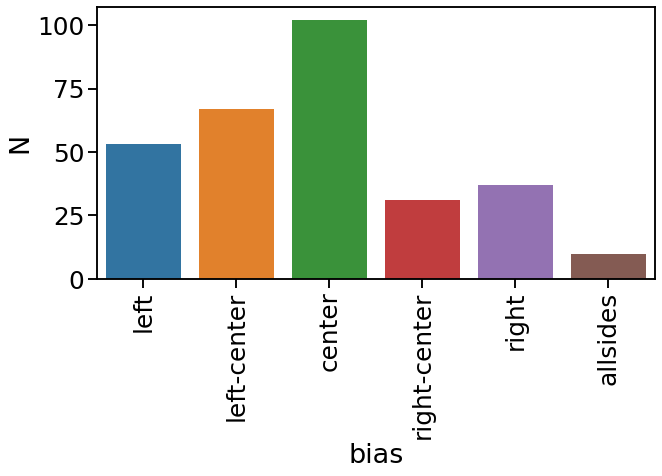

<Figure size 432x288 with 0 Axes>

In [15]:
# plot histograms of bias across publications

plt.figure(figsize=(10,5));
sns.countplot(all_sides_df['bias'],order=['left','left-center','center','right-center','right','allsides'])
plt.ylabel('N');
sns.set_context('talk', font_scale=1.5);
plt.xticks(rotation=90);
plt.show();
plt.clf();

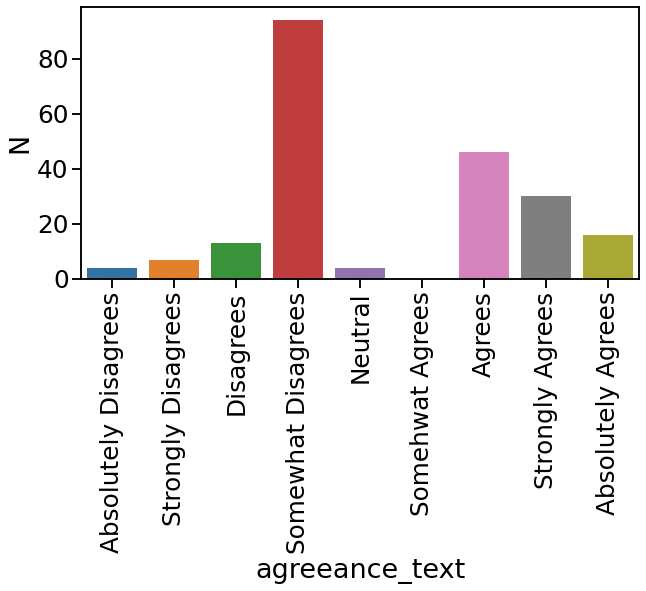

<Figure size 432x288 with 0 Axes>

In [64]:
plt.figure(figsize=(10,5));
sns.countplot(all_sides_df['agreeance_text'],order=['Absolutely Disagrees','Strongly Disagrees','Disagrees','Somewhat Disagrees','Neutral','Somehwat Agrees','Agrees','Strongly Agrees','Absolutely Agrees'])
plt.ylabel('N');
sns.set_context('talk', font_scale=1.5);
plt.xticks(rotation=90);
plt.show();
plt.clf();

We see that most vote tallies somewhat disagree with the given rating.

In [16]:
# what are the 'allsides ratings?'

all_sides_df_all_sides_rating = all_sides_df.loc[all_sides_df['bias']=='allsides']

In [17]:
all_sides_df_all_sides_rating.head()

,agree,agree_ratio,agreeance_text,allsides_page,bias,disagree,name,total_votes
2,223,1.581560,Agrees,https://www.allsides.com/news-source/abridge-n...,allsides,141,Abridge News,364
5,3686,2.482155,Strongly Agrees,https://www.allsides.com/news-source/allsides,allsides,1485,AllSides,5171
6,2368,1.684211,Agrees,https://www.allsides.com/news-source/allsides-...,allsides,1406,AllSides Community,3774
33,86,1.264706,Somewhat Agrees,https://www.allsides.com/news-source/braver-an...,allsides,68,Braver Angels,154
68,387,1.090141,Somewhat Agrees,https://www.allsides.com/news-source/counterpo...,allsides,355,Counterpointing,742


In [18]:
all_sides_df_all_sides_rating.shape

(10, 8)

In [20]:
# it's not so big, so let's just look at it all
all_sides_df_all_sides_rating

,agree,agree_ratio,agreeance_text,allsides_page,bias,disagree,name,total_votes
2,223,1.581560,Agrees,https://www.allsides.com/news-source/abridge-n...,allsides,141,Abridge News,364
5,3686,2.482155,Strongly Agrees,https://www.allsides.com/news-source/allsides,allsides,1485,AllSides,5171
6,2368,1.684211,Agrees,https://www.allsides.com/news-source/allsides-...,allsides,1406,AllSides Community,3774
33,86,1.264706,Somewhat Agrees,https://www.allsides.com/news-source/braver-an...,allsides,68,Braver Angels,154
68,387,1.090141,Somewhat Agrees,https://www.allsides.com/news-source/counterpo...,allsides,355,Counterpointing,742
152,146,1.206612,Somewhat Agrees,https://www.allsides.com/news-source/listen-fi...,allsides,121,Listen First Project,267
169,99,0.883929,Somewhat Disagrees,https://www.allsides.com/news-source/mismatcho...,allsides,112,Mismatch.org,211
257,84,1.166667,Somewhat Agrees,https://www.allsides.com/news-source/storycorp...,allsides,72,StoryCorps,156
259,161,0.847368,Somewhat Disagrees,https://www.allsides.com/news-source/suspend-b...,allsides,190,Suspend Belief Podcast,351
288,343,1.299242,Somewhat Agrees,https://www.allsides.com/news-source/flip-side...,allsides,264,The Flip Side,607


These look like news/media organizations that try to show all sides of an issue. It may be worth looking at what these websites do, for inspiration. These could also be generically recommended to the user.

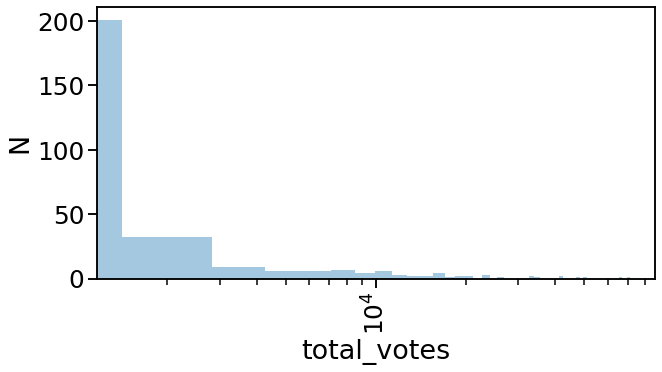

<Figure size 432x288 with 0 Axes>

In [24]:
# let's see what the distribution of total votes is

plt.figure(figsize=(10,5));
sns.distplot(all_sides_df['total_votes'],kde=False)
plt.ylabel('N');
sns.set_context('talk', font_scale=1.5);
plt.xticks(rotation=90);
plt.xscale('log')
plt.show();
plt.clf()

There are lots of websites with very few votes, and a few with thousands. My guess is that the websites with thousands of votes are the most popular news media organizations. Let's take a look at those.

In [52]:
total_votes_threshold = 10000

all_sides_df_high_votes = all_sides_df.loc[all_sides_df['total_votes']>=total_votes_threshold]

In [53]:
all_sides_df_high_votes.shape

(35, 8)

There are 35 news organizations with more than the above threshold number of votes votes. What are they? What are their biases?

In [54]:
all_sides_df_high_votes['name']

0                 ABC News (Online)
4                        Al Jazeera
13                 Associated Press
21                         BBC News
25                        Bloomberg
34                   Breitbart News
39                    BuzzFeed News
44                              CBN
45                         CBS News
54        Christian Science Monitor
59                   CNN (Web News)
60                  CNN - Editorial
72                      Daily Beast
82                    Democracy Now
95                    FactCheck.org
101                          Forbes
104               Fox News (Online)
106                Fox News Opinion
123                        HuffPost
172                    Mother Jones
173                           MSNBC
176                 National Review
178               NBC News (Online)
185                   New York Post
186    New York Times (Online News)
189                  Newsmax - News
198                 NPR Online News
209                        P

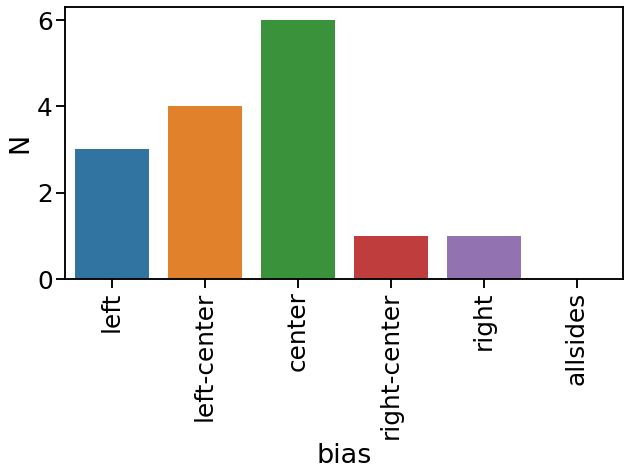

<Figure size 432x288 with 0 Axes>

In [51]:
plt.figure(figsize=(10,5));
sns.countplot(all_sides_df_high_votes['bias'],order=['left','left-center','center','right-center','right','allsides'])
plt.ylabel('N');
sns.set_context('talk', font_scale=1.5);
plt.xticks(rotation=90);
plt.show();
plt.clf();

These look like larger news organizations that will more likely cover lots of topics. There are more left and center-left news organizations than right and center-right. This is a good list of news organizations to include in the MVP.

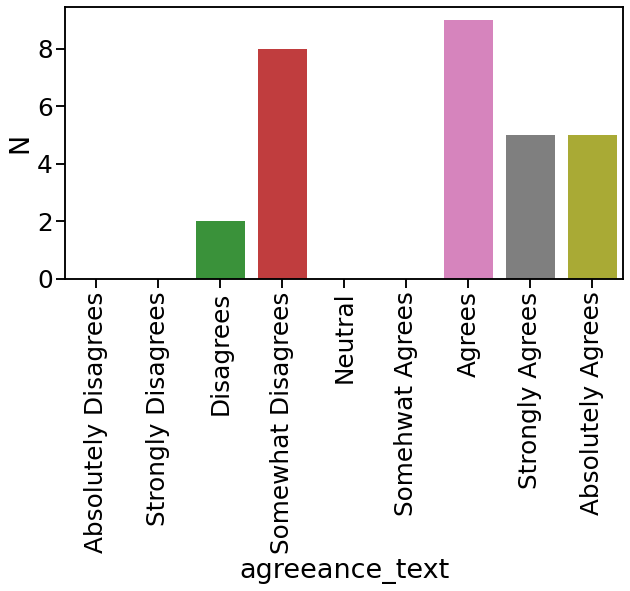

<Figure size 432x288 with 0 Axes>

In [65]:
# how often does the 'public' agree with these ratings?
plt.figure(figsize=(10,5));
sns.countplot(all_sides_df_high_votes['agreeance_text'],order=['Absolutely Disagrees','Strongly Disagrees','Disagrees','Somewhat Disagrees','Neutral','Somehwat Agrees','Agrees','Strongly Agrees','Absolutely Agrees'])
plt.ylabel('N');
sns.set_context('talk', font_scale=1.5);
plt.xticks(rotation=90);
plt.show();
plt.clf();

In [74]:
# look at those with agree votes and above

all_sides_df_high_votes_agree = all_sides_df_high_votes.loc[all_sides_df_high_votes['agreeance_text']=='Agrees']
all_sides_df_high_votes_strongly_agree = all_sides_df_high_votes.loc[all_sides_df_high_votes['agreeance_text']=='Strongly Agrees']
all_sides_df_high_votes_absolutely_agree = all_sides_df_high_votes.loc[all_sides_df_high_votes['agreeance_text']=='Absolutely Agrees']


all_sides_df_high_votes_agree_cat = pd.concat([all_sides_df_high_votes_agree,all_sides_df_high_votes_strongly_agree,all_sides_df_high_votes_absolutely_agree])

In [75]:
all_sides_df_high_votes_agree_cat

,agree,agree_ratio,agreeance_text,allsides_page,bias,disagree,name,total_votes
0,21052,1.680530,Agrees,https://www.allsides.com/news-source/abc-news-...,left-center,12527,ABC News (Online),33579
39,12672,1.656038,Agrees,https://www.allsides.com/news-source/buzzfeed-...,left,7652,BuzzFeed News,20324
44,6584,1.915067,Agrees,https://www.allsides.com/news-source/cbn,right,3438,CBN,10022
101,7487,1.804096,Agrees,https://www.allsides.com/news-source/forbes,center,4150,Forbes,11637
185,6809,1.566728,Agrees,https://www.allsides.com/news-source/new-york-...,right,4346,New York Post,11155
225,6707,1.556510,Agrees,https://www.allsides.com/news-source/reason,right-center,4309,Reason,11016
229,10520,1.762735,Agrees,https://www.allsides.com/news-source/reuters,center,5968,Reuters,16488
269,8369,1.947638,Agrees,https://www.allsides.com/news-source/atlantic,left-center,4297,The Atlantic,12666
292,8768,1.633687,Agrees,https://www.allsides.com/news-source/guardian,left-center,5367,The Guardian,14135
34,24980,2.733042,Strongly Agrees,https://www.allsides.com/news-source/breitbart,right,9140,Breitbart News,34120


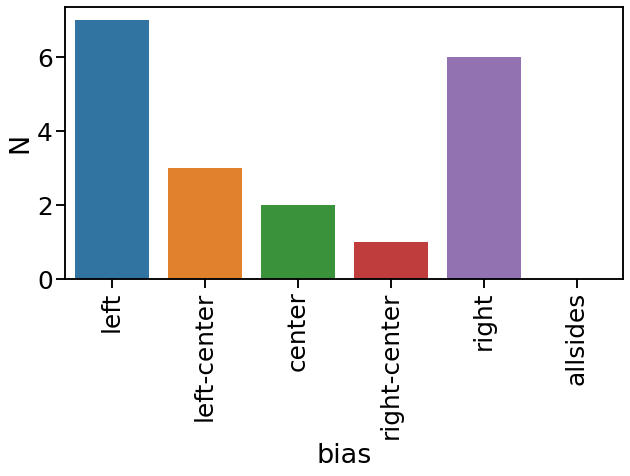

<Figure size 432x288 with 0 Axes>

In [80]:
plt.figure(figsize=(10,5));
sns.countplot(all_sides_df_high_votes_agree_cat['bias'],order=['left','left-center','center','right-center','right','allsides'])
plt.ylabel('N');
sns.set_context('talk', font_scale=1.5);
plt.xticks(rotation=90);
plt.show();
plt.clf();

In [82]:
# now let's look at those with somewhat disagrees and disagrees votes

all_sides_df_high_votes_disagree = all_sides_df_high_votes.loc[all_sides_df_high_votes['agreeance_text']=='Disagrees']
all_sides_df_high_votes_somewhat_disagree = all_sides_df_high_votes.loc[all_sides_df_high_votes['agreeance_text']=='Somewhat Disagrees']
all_sides_df_high_votes_disagree_cat = pd.concat([all_sides_df_high_votes_disagree,all_sides_df_high_votes_somewhat_disagree])

In [83]:
all_sides_df_high_votes_disagree_cat

,agree,agree_ratio,agreeance_text,allsides_page,bias,disagree,name,total_votes
4,4217,0.631382,Disagrees,https://www.allsides.com/news-source/al-jazeer...,left-center,6679,Al Jazeera,10896
25,9542,0.659844,Disagrees,https://www.allsides.com/news-source/bloomberg...,center,14461,Bloomberg,24003
54,11532,0.786684,Somewhat Disagrees,https://www.allsides.com/news-source/christian...,center,14659,Christian Science Monitor,26191
59,34299,0.937336,Somewhat Disagrees,https://www.allsides.com/news-source/cnn-media...,left-center,36592,CNN (Web News),70891
104,28971,0.777620,Somewhat Disagrees,https://www.allsides.com/news-source/fox-news-...,right-center,37256,Fox News (Online),66227
178,6635,0.865284,Somewhat Disagrees,https://www.allsides.com/news-source/nbc-news-...,left-center,7668,NBC News (Online),14303
186,20301,0.676362,Somewhat Disagrees,https://www.allsides.com/news-source/new-york-...,left-center,30015,New York Times (Online News),50316
189,7272,0.789662,Somewhat Disagrees,https://www.allsides.com/news-source/newsmax,right-center,9209,Newsmax - News,16481
209,17380,0.705443,Somewhat Disagrees,https://www.allsides.com/news-source/politico-...,left-center,24637,Politico,42017
293,10563,0.794509,Somewhat Disagrees,https://www.allsides.com/news-source/hill-medi...,center,13295,The Hill,23858


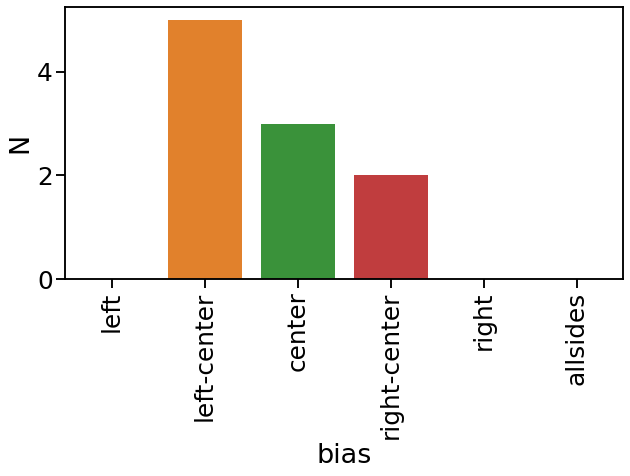

<Figure size 432x288 with 0 Axes>

In [84]:
plt.figure(figsize=(10,5));
sns.countplot(all_sides_df_high_votes_disagree_cat['bias'],order=['left','left-center','center','right-center','right','allsides'])
plt.ylabel('N');
sns.set_context('talk', font_scale=1.5);
plt.xticks(rotation=90);
plt.show();
plt.clf();

The disagreement is exclusively amongst those news organizations with left-center, center, and right-center ratings. Users tend to agree about those news organizations that are further left or right as rated by AllSides. 

Among those news organizations where there is disagreement between users and AllSides, we see some big name media organizations like Fox News and NYT, which I would not want to exclude from this product. 

I'll make a judgement call here and, for the MVP, utilize the bias score given by AllSides, even as there may be some disagreement between the scores they give and what many users think. This is not an easy call to make, but I will put my trust in AllSides's ratings for now, acknowledging that not all users will agree with AllSides.

To quote Steve Job, "People don't know what they want until you show it to them." For an MVP for open-minded consumers interested in diverse perspectives, I'm betting that the ratings by AllSidesMedia won't be crucial; the idea is to show diverse content across the spectrum, not to quantify where media organizations are on the spectrum per se.

In [85]:
all_sides_df_high_votes.to_csv('./all_sides_media_data/allsides_final.csv', index_label='index')

In [89]:
all_sides_with_domains = pd.read_csv('./all_sides_media_data/allsides_final_plus_others_with_domains.csv')

In [90]:
all_sides_with_domains.head()

,index,agree,agree_ratio,agreeance_text,allsides_page,bias,disagree,name,total_votes,domain
0,0.0,21052.0,1.680530,Agrees,https://www.allsides.com/news-source/abc-news-...,left-center,12527.0,ABC News (Online),33579.0,abcnews.go.com
1,4.0,4217.0,0.631382,Disagrees,https://www.allsides.com/news-source/al-jazeer...,left-center,6679.0,Al Jazeera,10896.0,aljazeera.com
2,13.0,13940.0,1.383898,Somewhat Agrees,https://www.allsides.com/news-source/associate...,center,10073.0,Associated Press,24013.0,apnews.com
3,21.0,17356.0,1.081303,Somewhat Agrees,https://www.allsides.com/news-source/bbc-news-...,center,16051.0,BBC News,33407.0,bbc.com
4,25.0,9542.0,0.659844,Disagrees,https://www.allsides.com/news-source/bloomberg...,center,14461.0,Bloomberg,24003.0,bloomberg.com


In [97]:
all_sides_names = all_sides_with_domains['name']
all_sides_domains = all_sides_with_domains['domain']

all_sides_names_domains = pd.concat([all_sides_names,all_sides_domains],axis=1)
print(all_sides_names)
print(all_sides_domains)
print(all_sides_names_domains)

0                ABC News (Online)
1                       Al Jazeera
2                 Associated Press
3                         BBC News
4                        Bloomberg
5                   Breitbart News
6                    BuzzFeed News
7                              CBN
8                         CBS News
9        Christian Science Monitor
10                  CNN (Web News)
11                     Daily Beast
12                   Democracy Now
13                   FactCheck.org
14                          Forbes
15               Fox News (Online)
16                        HuffPost
17                    Mother Jones
18                           MSNBC
19                 National Review
20               NBC News (Online)
21                   New York Post
22    New York Times (Online News)
23                  Newsmax - News
24                 NPR Online News
25                        Politico
26                          Reason
27                         Reuters
28                  

In [ ]:
all_sides_names_domains